In [2]:
library(tidyverse)
library(R.matlab)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.0.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.6
✔ tidyr   0.8.1     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
R.matlab v3.6.1 (2016-10-19) successfully loaded. See ?R.matlab for help.

Attaching package: ‘R.matlab’

The following objects are masked from ‘package:base’:

    getOption, isOpen



In [43]:
M <- readMat('/home/finc/Dropbox/Projects/LearningBrain/data/neuroimaging/modularity_results_conn.mat')

In [44]:
M <- M$M
M

1,1,1,0.19347217
1,1,2,0.18409796
1,1,3,0.17745661
1,2,1,0.23793698
1,2,2,0.19120596
1,2,3,0.26280531
1,3,1,0.19320579
1,3,2,0.11097321
1,3,3,0.16226106
1,4,1,0.17796214
1,4,2,0.25300724


In [45]:
col = c('sub', 'ses', 'task', 'Q')

Q = as.data.frame(M)
names(Q) <- col




In [46]:
# Selecting subjects which finished the study

groups = read.csv('/home/finc/Dropbox/Projects/LearningBrain/github//LearningBrain_networks/data/behavioral/group_assignment.csv')
groups = na.omit(groups)

groups$no <- c(1:46)

head(groups)

,sub,group,no
1,sub-01,Control,1
2,sub-02,Control,2
4,sub-04,Control,3
5,sub-05,Experimental,4
6,sub-06,Experimental,5
7,sub-07,Experimental,6


In [47]:
names(Q)[1] <- 'no'

In [48]:
modu <- left_join(groups, Q)

modu$ses <- as.factor(modu$ses)

Joining, by = "no"


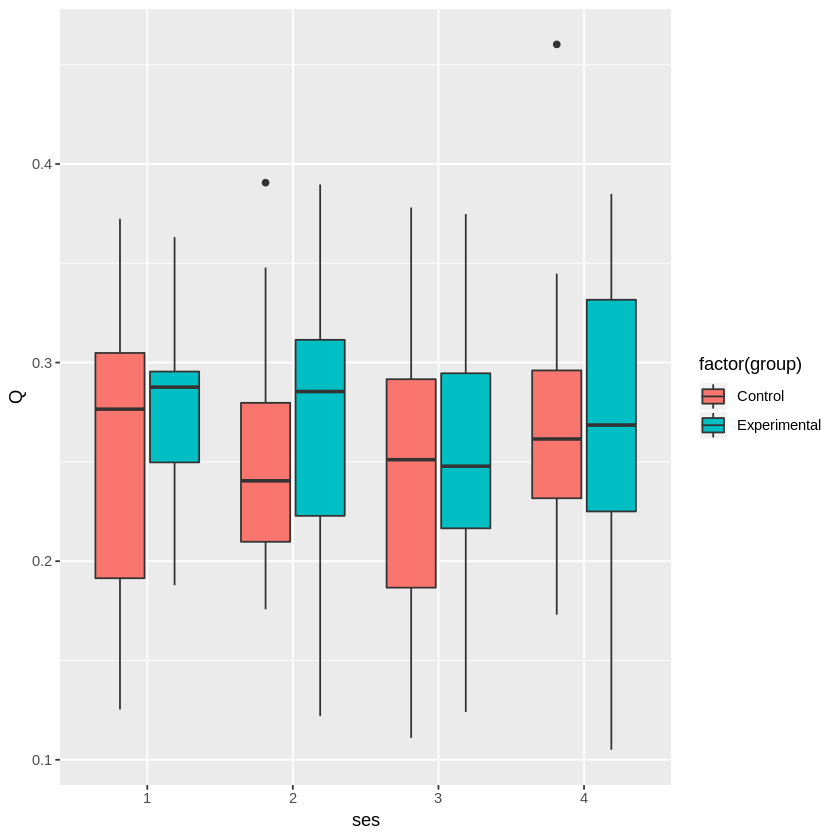

In [51]:
modu %>% 
    filter(!(sub %in% c('sub-13', 'sub-21', 'sub-23', 'sub-50'))) %>% filter(task == '2') %>%
    ggplot(aes(ses, Q, fill = factor(group))) + geom_boxplot()

In [10]:
performance <- read.csv('/home/finc/Dropbox/Projects/LearningBrain/data/behavioral/LB_training_summary.csv')

In [12]:
all <- left_join(performance, modu)

Joining, by = "sub"
Warning message:
“Column `sub` joining factors with different levels, coercing to character vector”

In [40]:
x = all %>% filter(!(sub %in% c('sub-13', 'sub-21', 'sub-23', 'sub-50')))

In [41]:
head(all)

sub,nback_mean_estimate,nback_max_estimate,nback_baseline,nback_max_level,group,no,ses,task,Q
sub-05,0.08441692,0.1186791,2.05,6,Experimental,4,1,1,0.4060722
sub-05,0.08441692,0.1186791,2.05,6,Experimental,4,1,2,0.2733240
sub-05,0.08441692,0.1186791,2.05,6,Experimental,4,1,3,0.2651021
sub-05,0.08441692,0.1186791,2.05,6,Experimental,4,2,1,0.5414914
sub-05,0.08441692,0.1186791,2.05,6,Experimental,4,2,2,0.2693884
sub-05,0.08441692,0.1186791,2.05,6,Experimental,4,2,3,0.2559088


In [38]:
B <- x %>% 
    filter(!(sub %in% c('sub-13', 'sub-21', 'sub-23', 'sub-50'))) %>% filter(group == 'Experimental') %>% filter(task == "1") %>% filter(ses == 4)

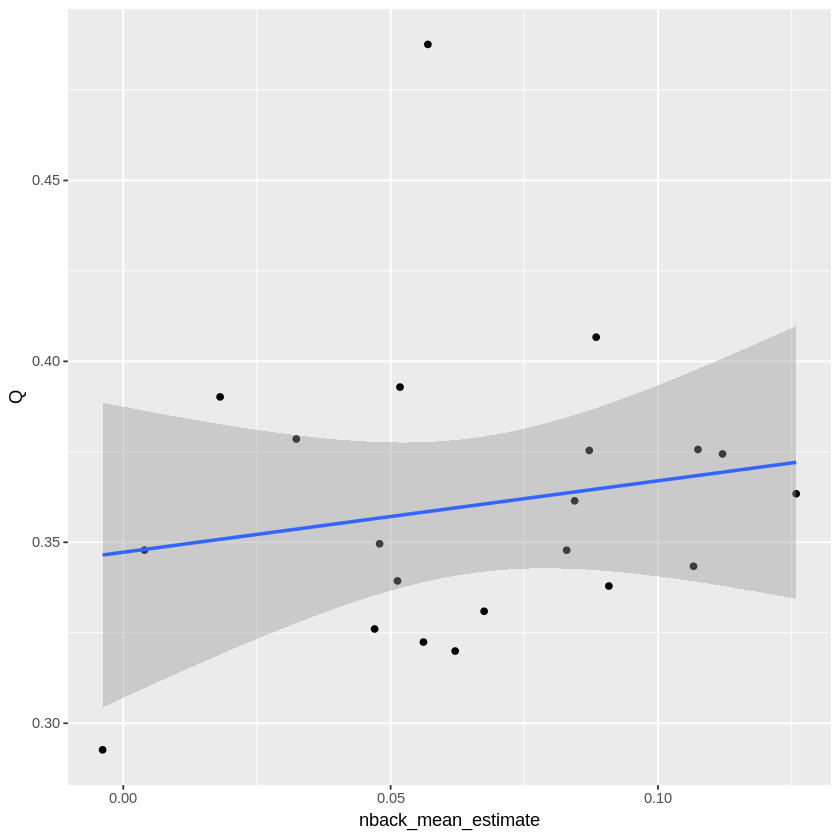

In [39]:
B %>% ggplot(aes(nback_mean_estimate, Q)) + geom_point() + geom_smooth(method = 'lm')

In [37]:
cor.test(B$nback_mean_estimate, B$Q)


	Pearson's product-moment correlation

data:  B$nback_mean_estimate and B$Q
t = -2.5723, df = 19, p-value = 0.01865
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.77080542 -0.09805723
sample estimates:
       cor 
-0.5082306 
